<a href="https://colab.research.google.com/github/RohanCoderiiitb/TinyML-Harvard/blob/main/Classification-on-MNIST-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

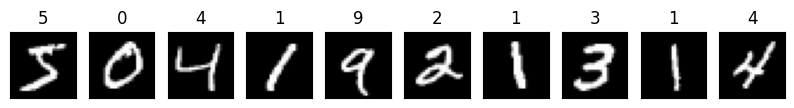

In [2]:
dataset = tf.keras.datasets.mnist
(training_images, training_labels),(val_images, val_labels) = dataset.load_data()
plt.figure(figsize=(10, 2))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(training_images[i], cmap='gray')
  plt.title(training_labels[i])
plt.show()

In [4]:
training_images = training_images/255.0
val_images = val_images/255.0
layer1 = tf.keras.layers.Dense(units=20, activation=tf.nn.relu)
layer2 = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    layer1,
                                    layer2])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=20, validation_data=(val_images, val_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4084 - loss: 2.0428 - val_accuracy: 0.7593 - val_loss: 1.0860
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7760 - loss: 0.9627 - val_accuracy: 0.8323 - val_loss: 0.6827
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8365 - loss: 0.6502 - val_accuracy: 0.8603 - val_loss: 0.5309
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8659 - loss: 0.5168 - val_accuracy: 0.8796 - val_loss: 0.4529
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8784 - loss: 0.4542 - val_accuracy: 0.8893 - val_loss: 0.4067
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8872 - loss: 0.4150 - val_accuracy: 0.8968 - val_loss: 0.3763
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8963 - loss: 0.3806 - val_accuracy: 0.9006 - val_loss: 0.3547
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8992 - loss: 0.3629 - 

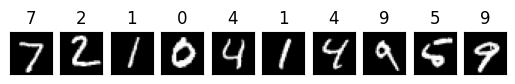

In [5]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(val_images[i], cmap='gray')
  plt.title(val_labels[i])
plt.show()

In [8]:
model.evaluate(val_images, val_labels)
classifications = model.predict(val_images)
print(classifications[8])
print(val_labels[8])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9077 - loss: 0.3148
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[7.2854426e-04 6.6033215e-07 3.1895193e-04 2.6065447e-07 1.1829134e-02
 1.8893440e-03 9.8437184e-01 2.5674535e-07 6.5490452e-04 2.0620953e-04]
5


In [10]:
print(layer1.get_weights())

[array([[-0.05042274, -0.02016091, -0.01592678, ...,  0.03441352,
        -0.00622603, -0.01221451],
       [ 0.057474  , -0.07725617, -0.02525623, ..., -0.05347617,
         0.0604814 , -0.01022683],
       [-0.01010092, -0.01440948,  0.02544567, ..., -0.01401874,
         0.01134776, -0.06888687],
       ...,
       [ 0.07125403,  0.06904265, -0.03711778, ..., -0.02203712,
        -0.02753846,  0.00303051],
       [ 0.08323728, -0.03560762,  0.03817208, ...,  0.08510228,
         0.02880131,  0.06855966],
       [-0.00375208, -0.08509272,  0.0417002 , ..., -0.02863972,
         0.01525246,  0.05551037]], dtype=float32), array([ 0.20173596,  0.3707017 ,  0.36552703, -0.00772644, -0.00955323,
        0.29808247, -0.0100176 ,  0.27458254,  0.14506024,  0.25114235,
        0.14258473,  0.84406406, -0.00556891,  0.4732587 , -0.00737281,
        0.0558282 ,  0.32348484,  0.5969836 ,  0.13409367,  0.6487684 ],
      dtype=float32)]


In [11]:
print(layer2.get_weights())

[array([[ 2.6885743 ,  2.2083888 ,  1.6243197 ,  2.851217  , -8.474994  ,
        -2.7626865 , -5.5948515 ,  1.8355021 , -0.01249496,  1.2099605 ],
       [-4.919486  ,  0.98401165, -1.1933863 , -1.7189928 ,  1.766268  ,
        -3.241449  ,  3.6966193 ,  0.26664224, -1.5135151 ,  2.2428265 ],
       [-1.955168  ,  1.6885194 , -5.0763507 ,  1.6727852 ,  3.6291492 ,
         1.1565444 ,  2.5797791 , -5.200985  , -1.6113222 ,  0.7940067 ],
       [-0.14428352, -0.2600167 ,  0.12075297, -0.09838908, -0.36441538,
         0.16061461,  0.42186624, -0.42493114,  0.24629036, -0.24460377],
       [ 0.15090314, -0.27666193, -0.34873438,  0.405111  ,  0.40098965,
        -0.10072531,  0.09811644, -0.08235738, -0.43508685,  0.10154811],
       [-2.3729358 ,  0.7136222 , -4.3774233 , -4.9481745 ,  0.72709703,
         3.029794  , -7.618548  ,  1.5289689 ,  3.32725   ,  1.725971  ],
       [-0.04807056,  0.28455514, -0.35430583,  0.42358288, -0.34565762,
        -0.12311258, -0.10919798, -0.3281665